# The Ames housing dataset

The <a href="http://jse.amstat.org/v19n3/decock.pdf">**Ames Housing dataset**</a> was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. It is a common <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview">**Kaggle competition**</a> that is usually used to explain advanced regression techniques.

Here's a brief version of what you'll find in the data description file (<code>ames_housing_description.txt</code>).

* Feature variables:
    * **MSSubClass** : The building class
    * **MSZoning** : The general zoning classification
    * **LotFrontage** : Linear feet of street connected to property
    * **LotArea** : Lot size in square feet
    * **Street** : Type of road access
    * **Alley** : Type of alley access
    * **LotShape** : General shape of property
    * **LandContour** : Flatness of the property
    * **Utilities** : Type of utilities available
    * **LotConfig** : Lot configuration
    * **LandSlope** : Slope of property
    * **Neighborhood** : Physical locations within Ames city limits
    * **Condition1** : Proximity to main road or railroad
    * **Condition2** : Proximity to main road or railroad (if a second is present)
    * **BldgType** : Type of dwelling
    * **HouseStyle** : Style of dwelling
    * **OverallQual** : Overall material and finish quality
    * **OverallCond** : Overall condition rating
    * **YearBuilt** : Original construction date
    * **YearRemodAdd** : Remodel date
    * **RoofStyle** : Type of roof
    * **RoofMatl** : Roof material
    * **Exterior1st** : Exterior covering on house
    * **Exterior2nd** : Exterior covering on house (if more than one material)
    * **MasVnrType** : Masonry veneer type
    * **MasVnrArea** : Masonry veneer area in square feet
    * **ExterQual** : Exterior material quality
    * **ExterCond** : Present condition of the material on the exterior
    * **Foundation** : Type of foundation
    * **BsmtQual** : Height of the basement
    * **BsmtCond** : General condition of the basement
    * **BsmtExposure** : Walkout or garden level basement walls
    * **BsmtFinType1** : Quality of basement finished area
    * **BsmtFinSF1** : Type 1 finished square feet
    * **BsmtFinType2** : Quality of second finished area (if present)
    * **BsmtFinSF2** : Type 2 finished square feet
    * **BsmtUnfSF** : Unfinished square feet of basement area
    * **TotalBsmtSF** : Total square feet of basement area
    * **Heating** : Type of heating
    * **HeatingQC** : Heating quality and condition
    * **CentralAir** : Central air conditioning
    * **Electrical** : Electrical system
    * **1stFlrSF** : First Floor square feet
    * **2ndFlrSF** : Second floor square feet
    * **LowQualFinSF** : Low quality finished square feet (all floors)
    * **GrLivArea** : Above grade (ground) living area square feet
    * **BsmtFullBath** : Basement full bathrooms
    * **BsmtHalfBath** : Basement half bathrooms
    * **FullBath** : Full bathrooms above grade
    * **HalfBath** : Half baths above grade
    * **Bedroom** : Number of bedrooms above basement level
    * **Kitchen** : Number of kitchens
    * **KitchenQual** : Kitchen quality
    * **TotRmsAbvGrd** : Total rooms above grade (does not include bathrooms)
    * **Functional** : Home functionality rating
    * **Fireplaces** : Number of fireplaces
    * **FireplaceQu** : Fireplace quality
    * **GarageType** : Garage location
    * **GarageYrBlt** : Year garage was built
    * **GarageFinish** : Interior finish of the garage
    * **GarageCars** : Size of garage in car capacity
    * **GarageArea** : Size of garage in square feet
    * **GarageQual** : Garage quality
    * **GarageCond** : Garage condition
    * **PavedDrive** : Paved driveway
    * **WoodDeckSF** : Wood deck area in square feet
    * **OpenPorchSF** : Open porch area in square feet
    * **EnclosedPorch** : Enclosed porch area in square feet
    * **3SsnPorch** : Three season porch area in square feet
    * **ScreenPorch** : Screen porch area in square feet
    * **PoolArea** : Pool area in square feet
    * **PoolQC** : Pool quality
    * **Fence** : Fence quality
    * **MiscFeature** : Miscellaneous feature not covered in other categories
    * **MiscVal** : Value of miscellaneous feature in \$
    * **MoSold** : Month Sold
    * **YrSold** : Year Sold
    * **SaleType** : Type of sale
    * **SaleCondition** : Condition of sale


* Predictive variable:
    * **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
    
#### Missing
There are several missing values that are represented in the CSV file as "?"
    
#### Objective
Our objective is to produce a good estimator of the house sale price. However, this time we are facing a more complex dataset. 

#### Table of contents
<ol>
    <li><a href="#preprocessing">Preprocessing</a></li>
        1.1. <a href="#find_missing">Find missing values</a><br>
        1.2. <a href="#impute_missing">Impute missing values</a><br>
    <li><a href="#exploratory_data_analysis">Exploratory data analysis</a></li>
        2.1. <a href="#univariate_analysis">Univariate analysis</a><br>
        2.2. <a href="#bivariate_analysis">Bivariate analysis</a><br>
    <li><a href="#regression_analysis">Regression analysis</a></li>
        3.1. <a href="#linear_regression">Linear regression</a><br>
        3.2. <a href="#lasso_regression">Lasso regression</a><br>
        3.3. <a href="#ridge_regression">Ridge regression</a><br>
        3.4. <a href="#decision_tree">Decision tree</a><br>
        3.5. <a href="#knn">KNN</a><br>
    <li><a href="#estimator_evaluation">Estimator evaluation</a></li>
</ol>

-----

In [116]:
import pandas as pd

df = pd.read_csv("../Data/ames_housing_train.csv")
df_test_final = pd.read_csv("../Data/ames_housing_test.csv")

df = df.drop(columns = ["Id"]) # Drop the ID column (ID of each house)
df_test_final = df_test_final.drop(columns = ["Id"]) # Drop the ID column (ID of each house)

print(df.shape)
print(df_test_final.shape)

(1460, 80)
(600, 80)


## 1 - Preprocessing

##### Replace missing values "?" with np.nan

In [117]:
import numpy as np

df.replace("?", np.nan, inplace = True)
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Select numeric variables for regression

In [118]:
df_numeric = df.select_dtypes(exclude="object")
df_test_final = df_test_final.select_dtypes(exclude="object")
print(df_numeric.shape)
print(df_test_final.shape)

(1460, 37)
(600, 37)


37 variables numericas

### 1.1 - Find missing values

In [133]:
missing_data = df_numeric.isnull()
true_counts_percentage = [(column, round(missing_data[column].values.sum() / df_numeric.shape[0], 2)) for column in missing_data.columns]
false_counts_percentage = [(column, round(~missing_data[column].values.sum() / df_numeric.shape[0], 2)) for column in missing_data.columns]
true_counts_percentage.sort(key=lambda x:x[1], reverse = True)
true_counts_percentage

[('GarageYrBlt', 0.06),
 ('MasVnrArea', 0.01),
 ('MSSubClass', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.0),
 ('SalePrice', 0.0)]

* Observamos que **LotFrontage** (superficie de acera) es una variable que tiene bastantes valores missing. Mas especificamente, el 18% de los valores. Dado que es un numero tan alto, consideramos la posibilidad de simplemente eliminar dicha variable.
* Observamos que **GarageYrBlt** (año en que se construyo el garaje) es una variable que si bien no tiene un porcentage tan alto de misssing values como la anterior, mantiene un porcentage considerable del 6%. En este caso nos encontramos ante varias opciones posibles: eliminar la variable, eliminar ese 6% de instancias o imputar ese 6% de instancias.
* Observamos que **MasVnrArea** (fachada de ladrillo) es una variable con solo un 0.01% de missing values. En este caso no hay duda de que podriamos imputar estos valores si no quieremos reducir el numero de instancias disponibles para nuestro analisis sin que "perjudique" a la distribucion.

Por experiencia, prefiero imputar cuando tenemos un numero de instancias tan bajo, asi que en el caso de GarageYrBlt y MasVnrArea, vamos a imputar sus valores. Lo vamos a hacer utilizando el iterativeImputer de Sklearn el cual suele funcionar bastante bien con datos numericos.

<img src="images/comparativa_imputacion.png" width="500">

### 1.2 - Impute/Drop missing values

In [120]:
# Eliminamos la variable LotFrontage, la cual tiene un alto porcentage de missing y 
# tampoco es una variable que a simple vista (vision sesgada) parezca importante
df_numeric = df_numeric.drop(["LotFrontage"], axis="columns")
df_test_final = df_test_final.drop(["LotFrontage"], axis="columns")

In [121]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Por simplicidad vamos a utilizar el estimador por defecto (una regresion lineal con regularizacion L2, Ridge)
# Se le puede pasar otro (i.e., un DecisionTreeRegressor, un KNNRegressor, etc.)
imputer = IterativeImputer(missing_values=np.nan,) 
df_numeric_imputed = df_numeric.copy()

# Le puedo pasar todo el dataframe (ya sin la variable LotFrontage) y que el mismo impute aquellas variables
# con missing restantes
#df_numeric_imputed = impute.fit_transform(df_numeric)

# Si queremos seleccionar solo un par de variables (por ejemplo porque queremos usar diferentes metodos de imputacion), 
# hay que tener en cuenta que Sklearn espera siempre que le pasemos un objeto DataFrame, no le vale un objeto Series 
# ni un numpy array, detalles que hacen que nos salgan errores tontos
df_numeric_imputed[["GarageYrBlt", "MasVnrArea"]] = imputer.fit_transform(df_numeric[["GarageYrBlt", "MasVnrArea"]])
df_test_final[["GarageYrBlt", "MasVnrArea"]] = imputer.fit_transform(df_test_final[["GarageYrBlt", "MasVnrArea"]])

In [44]:
# missing_data_2 = df_numeric_imputed.isnull()
# true_counts_percentage = [(column, round(missing_data_2[column].values.sum() / df_numeric.shape[0], 2)) for column in missing_data_2.columns]
# false_counts_percentage = [(column, round(~missing_data_2[column].values.sum() / df_numeric.shape[0], 2)) for column in missing_data_2.columns]
# true_counts_percentage.sort(key=lambda x:x[1], reverse = True)
# true_counts_percentage

# 3 - Exploratory data analysis

## 3.1 - Univariate analysis

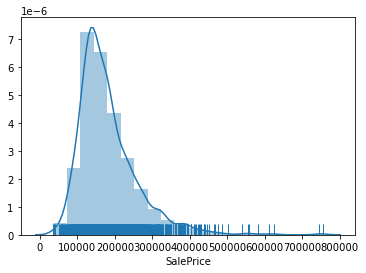

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df_numeric_imputed["SalePrice"]

sns.distplot(x, bins = 20, rug=True);

plt.show()

## 3.2 - Bivariate analysis

#### Correlation

In [57]:
df_numeric_imputed.corr()["SalePrice"].abs().sort_values(ascending=False) # built-in sort function
ordered_columns_corr = df_numeric_imputed.corr()["SalePrice"].abs().sort_values(ascending=False).index
ordered_columns_corr

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'OverallCond',
       'MoSold', '3SsnPorch', 'YrSold', 'LowQualFinSF', 'MiscVal',
       'BsmtHalfBath', 'BsmtFinSF2'],
      dtype='object')

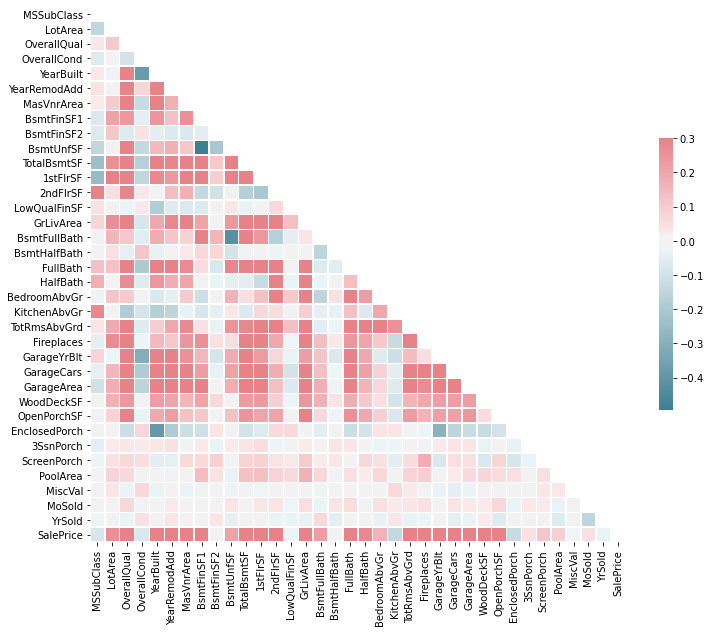

In [58]:
import numpy as np

corr = df_numeric_imputed.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Regression plots

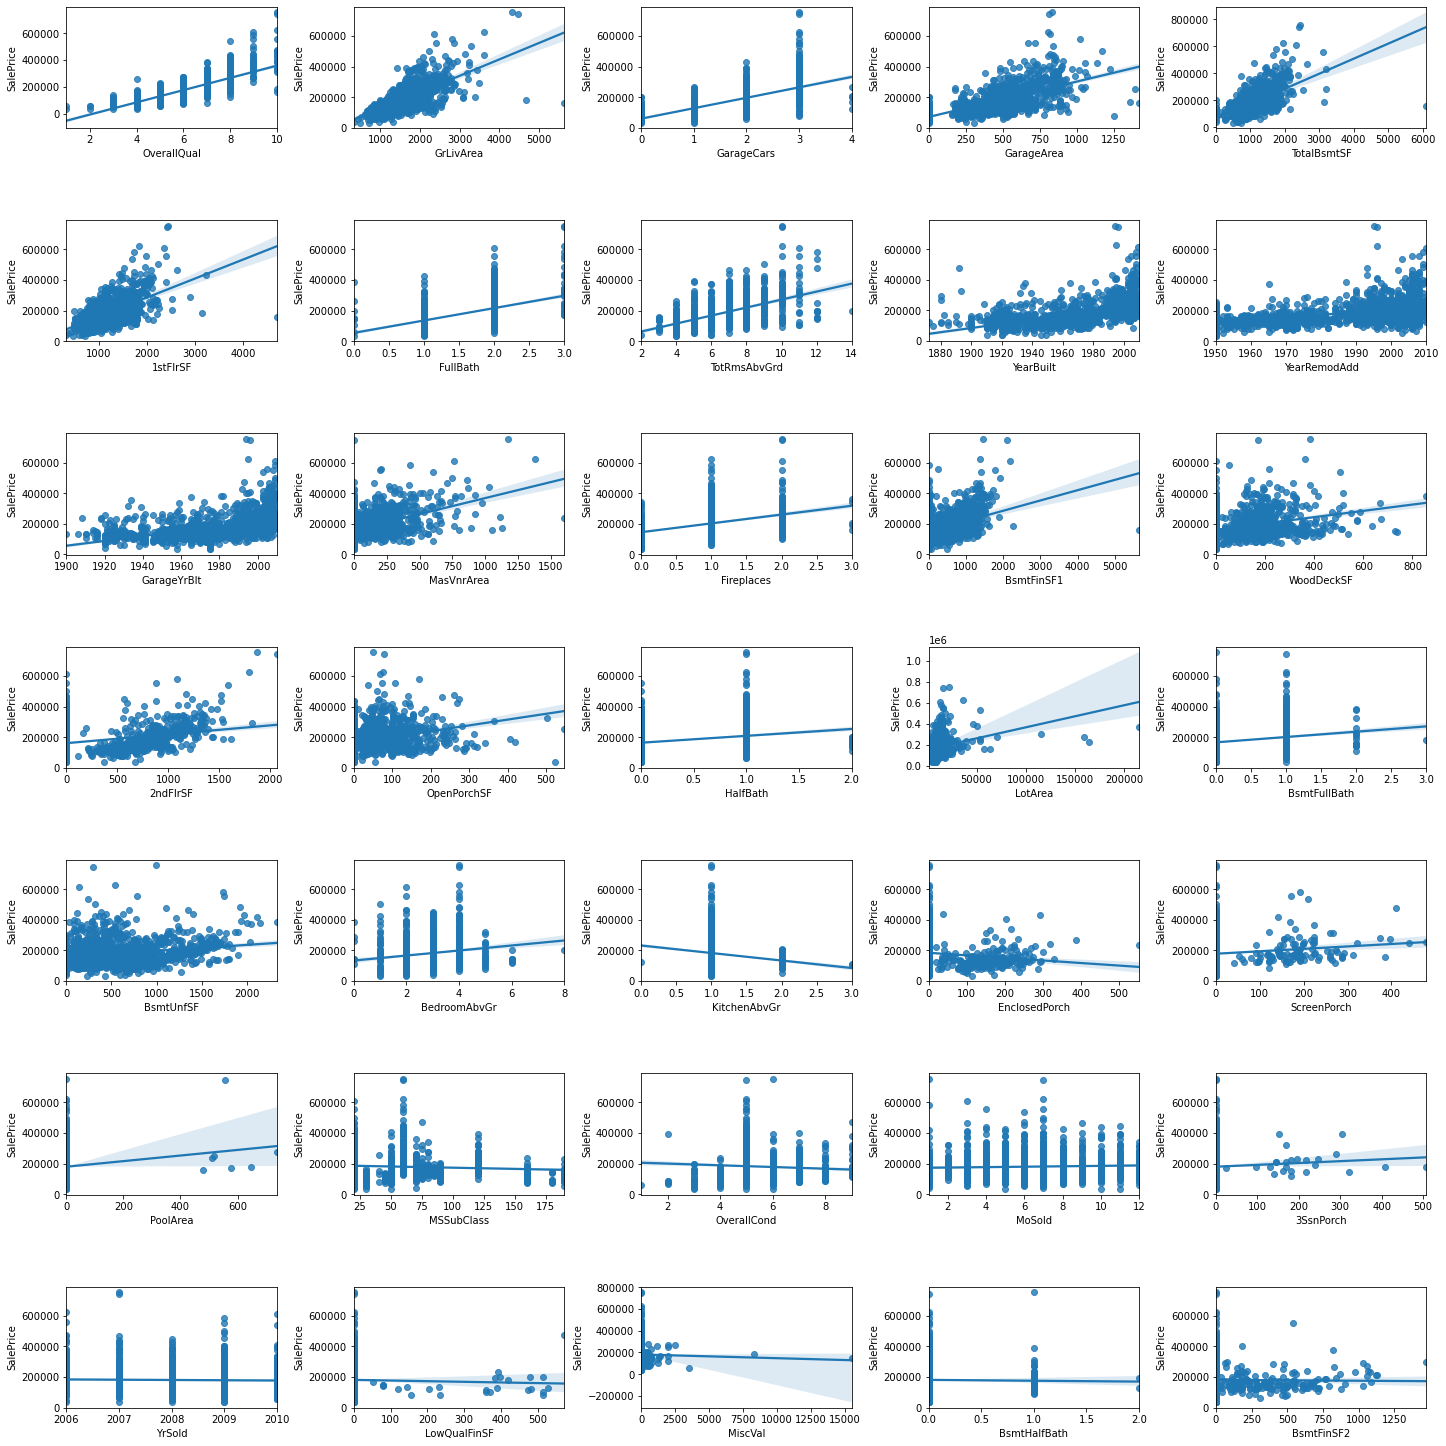

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=5, nrows=7, figsize=(20, 20))
axs = axs.flatten()

index = 0
for colname in ordered_columns_corr:
    if colname != "SalePrice":
        sns.regplot(ax=axs[index], x=colname, y="SalePrice", data=df_numeric_imputed)
        index += 1
        
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# 3 - Regression analysis

In [62]:
from sklearn.model_selection import train_test_split

X = df_numeric_imputed.drop(columns=["SalePrice"])
Y = df_numeric_imputed["SalePrice"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [64]:
print(X_train.shape)
print(Y_train.shape) # 1 var, SalePrice
print(X_test.shape)
print(Y_test.shape) # 1 var, SalePrice

(1168, 35)
(1168,)
(292, 35)
(292,)


## 3.1 - Linear regression

In [96]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

##### One-dimensional linear regression

In [97]:
from sklearn.model_selection import cross_val_score

X_train_onedim = X_train[["OverallQual"]]
X_test_onedim = X_test[["OverallQual"]]

scores = cross_val_score(lin_reg, X_train_onedim, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.6134395222747401


##### Multi-dimensional linear regression

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7437731850513546


Parece que simplemente usar una unica variable no es suficiente para predecir con una regresion lineal el precio de la casa. Utilizando mas de una variable observamos una mejora en el score cross-validado. Ahora nos surge la duda de si es necesario utilizar todas las variables (35) para predecir o si nos podriamos quedar con un subset de las mismas. 

La intuicion me dice que hay ciertas variables interesantes para probar asi manualmente, unas pocas que parecen estar correlacionadas con la variable de precio pero no muy correlacionadas entre ellas:

* **OverallQual**
* **GrLivArea**
* **FullBath**
* **GarageCars**

##### Multi-dimensional linear regression with manual feature selection

In [105]:
selected_features = ["OverallQual", "GrLivArea", "FullBath", "GarageCars"]

lin_reg_fs = LinearRegression()
scores = cross_val_score(lin_reg_fs, X_train[selected_features], Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7108230296329587


## 3.2 - Ridge regression

In [73]:
from sklearn.linear_model import Ridge
ridge_reg_1 = Ridge(alpha=1.0) 

scores = cross_val_score(ridge_reg_1, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7438386980913776


In [74]:
from sklearn.linear_model import Ridge
ridge_reg_05 = Ridge(alpha=0.5) 

scores = cross_val_score(ridge_reg_05, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7438065262222675


## 3.3 - Lasso regression

In [75]:
from sklearn.linear_model import Lasso
lasso_reg_1 = Lasso(alpha=1.0) 

scores = cross_val_score(lasso_reg_1, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7437739540047841


In [134]:
from sklearn.linear_model import Lasso
lasso_reg_05 = Lasso(alpha=150.5) 

scores = cross_val_score(lasso_reg_05, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7436699408685794


En este caso habria que estandarizar para ver su efecto bien, como hay variables con alto numero de diferencia de valores, no se nota casi la regularizaicon, no es capaz e optimizar correctamente

## 3.4 - Decision tree

In [108]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=0)

scores = cross_val_score(dt_reg, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.651959947967511


In [109]:
from sklearn.tree import DecisionTreeRegressor

dt_reg_fs = DecisionTreeRegressor(random_state=0)

scores = cross_val_score(dt_reg_fs, X_train[selected_features], Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.5912949909924131


## 3.5 - KNN

In [84]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg_3 = KNeighborsRegressor(n_neighbors=3)
scores = cross_val_score(knn_reg_3, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.6425895504928478


In [85]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg_5 = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(knn_reg_5, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.6574296644697877


# 4 - Estimator evaluation

In [110]:
lin_reg_fitted = lin_reg.fit(X_train, Y_train)
lin_reg_fs_fitted = lin_reg_fs.fit(X_train[selected_features], Y_train)
ridge_reg_fitted = ridge_reg_05.fit(X_train, Y_train)
lasso_reg_fitted = lasso_reg_05.fit(X_train, Y_train)
dt_reg_fitted = dt_reg.fit(X_train, Y_train)
dt_reg_fs_fitted = dt_reg_fs.fit(X_train[selected_features], Y_train)
knn_fitted = knn_reg_5.fit(X_train, Y_train)

## 4.1 - Our test

In [111]:
print("Linear regression score: " + str(lin_reg_fitted.score(X_test, Y_test)))
print("Linear regression with manual FS score: " + str(lin_reg_fs_fitted.score(X_test[selected_features], Y_test)))
print("Ridge regression score: "+ str(ridge_reg_fitted.score(X_test, Y_test)))
print("Lasso regression score: "+ str(lasso_reg_fitted.score(X_test, Y_test)))
print("Decision tree score: " + str(dt_reg_fitted.score(X_test, Y_test)))
print("Decision tree manual FS score: " + str(dt_reg_fs_fitted.score(X_test[selected_features], Y_test)))
print("KNN score: " + str(knn_fitted.score(X_test, Y_test)))

Linear regression score: 0.829265602856786
Linear regression with manual FS score: 0.7682844366306059
Ridge regression score: 0.8293071304053082
Lasso regression score: 0.8310535091891742
Decision tree score: 0.7789821904739621
Decision tree manual FS score: 0.6856433745135556
KNN score: 0.5588737760069409


## 4.2 - Extra test

In [123]:
X_test_final = df_test_final.drop(["SalePrice"], axis="columns")
Y_test_final = df_test_final["SalePrice"]

In [124]:
print("Linear regression score: " + str(lin_reg_fitted.score(X_test_final, Y_test_final)))
print("Linear regression with manual FS score: " + str(lin_reg_fs_fitted.score(X_test_final[selected_features], Y_test_final)))
print("Ridge regression score: "+ str(ridge_reg_fitted.score(X_test_final, Y_test_final)))
print("Lasso regression score: "+ str(lasso_reg_fitted.score(X_test_final, Y_test_final)))
print("Decision tree score: " + str(dt_reg_fitted.score(X_test_final, Y_test_final)))
print("Decision tree manual FS score: " + str(dt_reg_fs_fitted.score(X_test_final[selected_features], Y_test_final)))
print("KNN score: " + str(knn_fitted.score(X_test_final, Y_test_final)))

Linear regression score: 0.7676557561300192
Linear regression with manual FS score: 0.701427263188726
Ridge regression score: 0.7676122740848937
Lasso regression score: 0.7669681513621067
Decision tree score: 0.9635129391867913
Decision tree manual FS score: 0.9111151537399106
KNN score: 0.7774764982168643
